In [1]:
import os
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#The directory where the train and test dataset can be found
train_dir='C:\\Users\\Mervin\\train'
test_dir='C:\\Users\\Mervin\\test'

In [3]:
#Create a function to preprocess the image data into numpy array so that it can be feed into the neural network later.
#Train image data has the format of Cat.0.jpg,Dog.1.jpg and etc
#The function will help to label the data 1 if it is Cat and 0 if it is a dog.
def make_training_data(data):
    x=[]
    img_size=100
    cat_label=1
    dog_label=0
    for pic in tqdm(os.listdir(data)):
        path=os.path.join(data,pic)
        img=cv2.imread(path)
        img=cv2.resize(img,(img_size,img_size))
        if pic.split(".")[0]=="cat":
            x.append([np.array(img),np.array(cat_label)])
        elif pic.split(".")[0]=="dog":
            x.append([np.array(img),np.array(dog_label)])
    np.random.shuffle(x)
    np.save("training_data2.npy",x)
    return x


In [4]:
training_data=make_training_data(train_dir)

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:51<00:00, 486.33it/s]


In [5]:
#We save the data so that we will only need to run the function once 
training_data=np.load("training_data2.npy",allow_pickle=True)

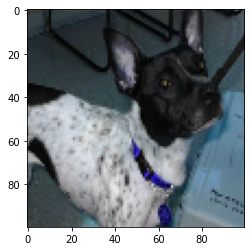

In [6]:
#PLot to show that we have imported the image data correctly
plt.imshow(training_data[2][0])

In [7]:
"""
Create a function to preprocess the test data into numpy array
Since the test data has a different format of 1.jpg,2.jpg and etc we need to create a new function for it.
The function will help to label the picture from 1-12500 and we will make use of our CNN model to predict whether the image
is a cat or dog
"""
def make_test_data(data):
    x=[]
    img_size=100
    for pic in tqdm(os.listdir(data)):
        img_num=pic.split(".")[0]
        path=os.path.join(data,pic)
        img=cv2.imread(path)
        img=cv2.resize(img,(img_size,img_size))
        x.append([img_num,img])
    np.save("testing_data.npy",x)
    return x

    

In [8]:
test_data=make_test_data(test_dir)

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:27<00:00, 449.41it/s]


In [9]:
test_data=np.load("testing_data.npy",allow_pickle=True)

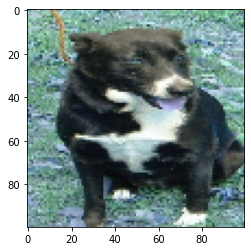

In [10]:
plt.imshow(test_data[3][1])

In [11]:
np.shape(training_data)

(25000, 2)

In [12]:
np.shape(test_data)

(12500, 2)

In [13]:
#Separate the data into X label and y label
#X label will be the numpy array of the image data while y label will be label for that particular image,
#1 for cat and 0 for dog

X=[]
y=[]
for features,labels in training_data:
    X.append(features)
    y.append(labels)
X=np.array(X).reshape(-1,100,100,3)

In [14]:
np.shape(X)

(25000, 100, 100, 3)

In [15]:
#Normalize the data
X=X/255.0

In [16]:
y=np.array(y)

In [17]:
#Split the train data into train data and validation data
val_pct=0.3
val_size=int(len(X)*val_pct)

In [18]:
train_X=X[:-val_size]
train_y=y[:-val_size]
test_X=X[-val_size:]
test_y=y[-val_size:]

In [19]:
#We are now ready to train the model.
#We will first start off by training the model on the base line CNN.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [20]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


          

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

In [22]:
model.compile(loss='binary_crossentropy',
optimizer="adam",
metrics=['acc'])

In [23]:
model.fit(train_X,train_y,batch_size=32,epochs=20,validation_data=(test_X,test_y))

Epoch 1/20
547/547 [==============================] - 24s 45ms/step - loss: 0.6072 - acc: 0.6560 - val_loss: 0.5434 - val_acc: 0.7332
Epoch 2/20
547/547 [==============================] - 16s 29ms/step - loss: 0.5130 - acc: 0.7536 - val_loss: 0.4799 - val_acc: 0.7708
Epoch 3/20
547/547 [==============================] - 13s 24ms/step - loss: 0.4449 - acc: 0.7946 - val_loss: 0.4621 - val_acc: 0.7841
Epoch 4/20
547/547 [==============================] - 13s 24ms/step - loss: 0.4033 - acc: 0.8190 - val_loss: 0.4158 - val_acc: 0.8047
Epoch 5/20
547/547 [==============================] - 15s 28ms/step - loss: 0.3565 - acc: 0.8417 - val_loss: 0.3940 - val_acc: 0.8267
Epoch 6/20
547/547 [==============================] - 13s 25ms/step - loss: 0.3202 - acc: 0.8587 - val_loss: 0.3784 - val_acc: 0.8360
Epoch 7/20
547/547 [==============================] - 15s 27ms/step - loss: 0.2828 - acc: 0.8807 - val_loss: 0.3646 - val_acc: 0.8424
Epoch 8/20
547/547 [==============================] - 14s 25ms

In [24]:
plt.rcParams['figure.figsize'] = [10,5]

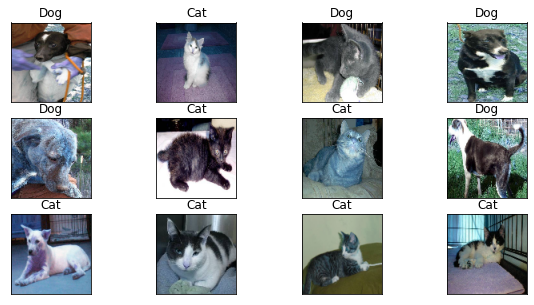

In [27]:
#Plot the predicted result in a 3X4 figure plot 
fig = plt.figure()

for num,data in enumerate (test_data[:12]):
    img_num=data[0]
    img_data=data[1]
    
    y=fig.add_subplot(3,4,num+1)
    orig_data=img_data
    data=np.array(img_data).reshape(-1,100,100,3)
    data=data/255.0
    
    model_out=model.predict([data])[0]    
    if int(np.round(model_out))== 1:
        str_label="Cat"
    else:
        str_label="Dog"
    y.imshow(orig_data)
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [28]:
#We now try to improve the result by utilizing on the pre-trained model VGG16
from tensorflow.keras.applications import VGG16

In [29]:
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(100, 100, 3))

In [30]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [31]:
#Append the VGG16 layers into model2 and add in one more dense layer
model2=Sequential()
for layer in conv_base.layers:
    model2.add(layer)    


model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [32]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 25, 25, 256)      

In [33]:
#Freeze the VGG16 model so that only the last 3 Dense layer will be train
for layer in model2.layers[:-3]:
    layer.trainable=False

In [34]:
print(len(model2.trainable_weights))

4


In [35]:
model2.compile(loss='binary_crossentropy',
optimizer="adam",
metrics=['acc'])

In [36]:
model2.fit(train_X,train_y,batch_size=512,epochs=10,validation_data=(test_X,test_y))

Epoch 1/10
35/35 [==============================] - 44s 1s/step - loss: 0.4823 - acc: 0.7631 - val_loss: 0.3454 - val_acc: 0.8401
Epoch 2/10
35/35 [==============================] - 31s 893ms/step - loss: 0.3115 - acc: 0.8655 - val_loss: 0.3159 - val_acc: 0.8619
Epoch 3/10
35/35 [==============================] - 34s 970ms/step - loss: 0.2766 - acc: 0.8846 - val_loss: 0.2867 - val_acc: 0.8775
Epoch 4/10
35/35 [==============================] - 36s 1s/step - loss: 0.2568 - acc: 0.8922 - val_loss: 0.3008 - val_acc: 0.8695
Epoch 5/10
35/35 [==============================] - 37s 1s/step - loss: 0.2501 - acc: 0.8961 - val_loss: 0.2710 - val_acc: 0.8843
Epoch 6/10
35/35 [==============================] - 35s 991ms/step - loss: 0.2317 - acc: 0.9035 - val_loss: 0.2929 - val_acc: 0.8729
Epoch 7/10
35/35 [==============================] - 31s 895ms/step - loss: 0.2267 - acc: 0.9063 - val_loss: 0.2738 - val_acc: 0.8803
Epoch 8/10
35/35 [==============================] - 29s 820ms/step - loss: 0.2

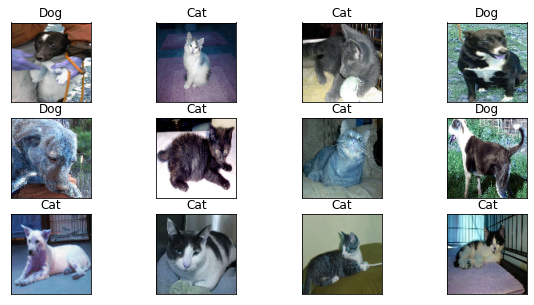

In [37]:
fig2 = plt.figure()
for num,data in enumerate (test_data[:12]):
    img_num=data[0]
    img_data=data[1]
    
    z=fig2.add_subplot(3,4,num+1)
    orig_data=img_data
    data=np.array(img_data).reshape(-1,100,100,3)
    data=data/255.0
    
    model_out =model2.predict([data])[0]    
    if int(np.round(model_out))== 1:
        str_label="Cat"
    else:
        str_label="Dog"
    z.imshow(orig_data)
    plt.title(str_label)
    z.axes.get_xaxis().set_visible(False)
    z.axes.get_yaxis().set_visible(False)

In [38]:
#Create a new excel file with ID and Label
with open('sample_submission.csv','w') as f:
    f.write("id,label\n")
    

In [39]:
#Append the prediction result into it and submit it to Kaggle
with open('sample_submission.csv','a') as f:
    for data in tqdm(test_data):
        img_num=data[0]
        img_data=data[1]
        orig_data=img_data
        data=np.array(img_data).reshape(-1,100,100,3)
        data=data/255.0
        model_out =model2.predict([data])[0]
        f.write("{},{}".format(img_num,model_out[0]))
        f.write('\n')

100%|████████████████████████████████████████████████████████████████████████████| 12500/12500 [04:52<00:00, 42.76it/s]
